# Logistic Regression

Binary classification using logistic regression.

### Theory

The goal is to estimate some Bernoulli target variable $y$ based on some predictor variables $\mathbf{x}$. The theory of logistic regression begins with the definition of the _odds ratio_ (i.e. odds in favor of a particular event occuring):

$$\frac{p}{1-p}$$

where $p$ is the probability of the event occurring. In this context, the event is the Bernoulli target variable $y$ being true (i.e. $y=1$). Subsequently, the _logit function_ can be defined:

$$logit(p) = log \frac{p}{1-p}$$

The logit function serves to map the probability $p$ from $[0,1]$ to $\mathbb{R}$. Moreover, it takes the rational function $\frac{p}{1-p}$ and transforms it into a linear function of the log probability via:

$$logit(p) = log \frac{p}{1-p} = log(p)-log(1-p)$$

The linearity of $logit(p)$ in terms of the log-probabilities allows it to be approximated by another linear function. This other approximating linear function can be a function of the predictor variables $\mathbf{x}$, namely:

$$logit(p) = \sum^{m}_{i=0}{w_i x_i} = \mathbf{w^{T}}\mathbf{x}$$

where $m$ is the dimension  of predictor variable $\mathbf{x}$. This can also be expressed as: 

$$logit(p(y=1 | \mathbf{x})) = \mathbf{w^{T}}\mathbf{x}$$

Now let's define:

$$z = \mathbf{w^{T}}\mathbf{x}$$

The final transformation is to compose the logit function with the sigmoid function to compress the range back to $[0,1]$ while having a domain of $\mathbb{R}$ for the predictor variables. 

$$\boxed{ \phi(z) = \frac{1}{1+e^{-z}}}$$

At this point, one has a function $\phi:\mathbb{R}^{n} \to [0,1]$ which allows a domain of $\mathbb{R}^{n}$ for the predictor variables $\mathbf{x}$ and a range of $[0,1]$ for the Bernoulli target variable $y$. To ensure that $\widehat{y}$ _only_ takes values of 0 or 1, the output of the sigmoid is "rectified" according to:

$$\widehat{y} = 
\begin{cases}
      1, & \text{if}\ \phi (z)\geq 0.5 \\
      0, & \text{otherwise}
    \end{cases}
$$


The sigmoid function is plotted below for illustration. 

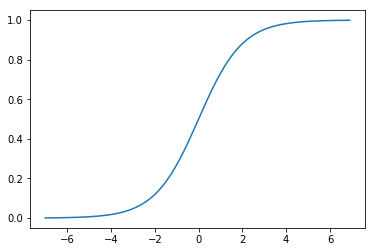

In [3]:
import numpy as np
import matplotlib.pyplot as plt

#define the sigmoid function
def sigmoid(z):
    return 1.0/(1.0 + np.exp(-z))


z = np.arange(-7,7,0.1)

phi_z = sigmoid(z)
plt.plot(z,phi_z)

### Loss Function

Define the likelihood function for the logistic classifier as the following:

$$L(\mathbf{w}) = P(\mathbf{y} | \mathbf{x}; \mathbf{w}) = \prod_{i=1}^{n} P(y^{(i)} | x^{(i)}; \mathbf{w}) = (\phi(z^{(i)}))^{y^{(i)}}(1-\phi(z^{(i)}))^{1-y^{(i)}}$$

where $n$ is the number of labelled samples in the dataset and $i$ is an index over the samples. Rember that $y^{(i)}$ is Bernoulli, so the $y^{(i)}$ exponents only serve to "switch" either term "on" or "off" in the RHS product. 

Maximization of a likelihood function is easier done on a log-likelihood, which in this case is the following:

$$l(\mathbf{w}) = log L(\mathbf{w}) = \sum_{i=1}^{n}(log(\phi(z^{(i)})) +(1-y^{(i)})log(1-\phi(z^{(i)})) )$$

To apply gradient descent by finding a minimum of a function, take the negative of the log-likelihood to obtain the final loss function $J$:

$$\boxed{J(\mathbf{w}) = -\sum_{i=1}^{n}(log(\phi(z^{(i)})) +(1-y^{(i)})log(1-\phi(z^{(i)})) )}$$


Remember that gradient descent on a loss function $J(\mathbf{w})$ has the following update rule for the weights:

$$\mathbf{w} = \mathbf{w} + \Delta \mathbf{w}$$

where:

$$\Delta \mathbf{w} = -\eta J(\mathbf{w})$$

where $\eta$ is the learning rate. 


### Plotting Utilities

In [9]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, classifier,test_idx=None, resolution=0.02):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

       # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
       # plot all samples
    X_test, y_test = X[test_idx, :], y[test_idx]
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],alpha=0.8, c=cmap(idx),marker=markers[idx], label=cl)

    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1], c='',alpha=1.0, linewidth=1, marker='o',s=55, label='test set')

### Data Import

`iris` dataset from `scikit-learn`

In [10]:
from sklearn import datasets
import numpy as np
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target


### Cross-validation Dataset Splitting

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### Preprocessing

Apply __standardization__ to give the predictor variables $\mathbf{X}$ a standard normal distribution. 

In [12]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

### Classification

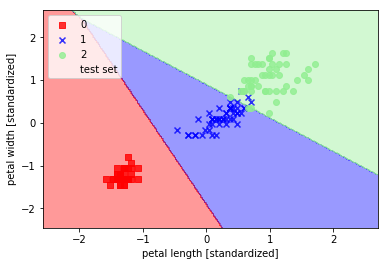

In [13]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=1000.0, random_state=0)
lr.fit(X_train_std, y_train)

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X_combined_std, y_combined, classifier=lr,test_idx=range(105,150))

plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()